# Assignmnet -14 Decision Tree (Company Data)

### Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
#importing liabraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

In [2]:
df=pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
df.loc[df["Sales"] <= 10.00,"Sales1"]="Not High"
df.loc[df["Sales"] >= 10.01,"Sales1"]="High"
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Not High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Not High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Not High
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Not High
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Not High
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Not High


In [7]:
# find categorical variables in training data set

traincategorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(traincategorical)))

print('The categorical variables are :\n\n', traincategorical)

There are 4 categorical variables

The categorical variables are :

 ['ShelveLoc', 'Urban', 'US', 'Sales1']


In [8]:
label_encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 
df['Sales1']= label_encoder.fit_transform(df['Sales1']) 

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,1


In [10]:
#split the data into dependant and independant variable
X = df.iloc[:,1:10]
y = df['Sales1']


In [11]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1
396,139,23,3,37,120,2,55,11,0
397,162,26,12,368,159,2,40,18,1
398,100,79,7,284,95,0,50,12,1


In [12]:
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales1, Length: 400, dtype: int32

In [13]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=50) 

In [14]:
y_test

146    1
332    1
67     1
362    1
102    1
      ..
55     1
65     1
16     1
153    1
225    1
Name: Sales1, Length: 80, dtype: int32

In [15]:
#model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [16]:
model.get_n_leaves()

8

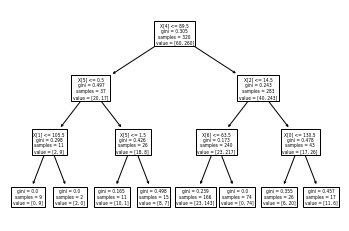

In [17]:
tree.plot_tree(model);

In [18]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

1    68
0    12
dtype: int64

In [19]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.8

In [20]:
result = confusion_matrix(preds, y_test)
print("Confusion Matrix:")
print(result)
result1 = classification_report(preds, y_test)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(preds, y_test)
print("Accuracy:",result2)

Confusion Matrix:
[[ 7  5]
 [11 57]]
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.92      0.84      0.88        68

    accuracy                           0.80        80
   macro avg       0.65      0.71      0.67        80
weighted avg       0.84      0.80      0.82        80

Accuracy: 0.8


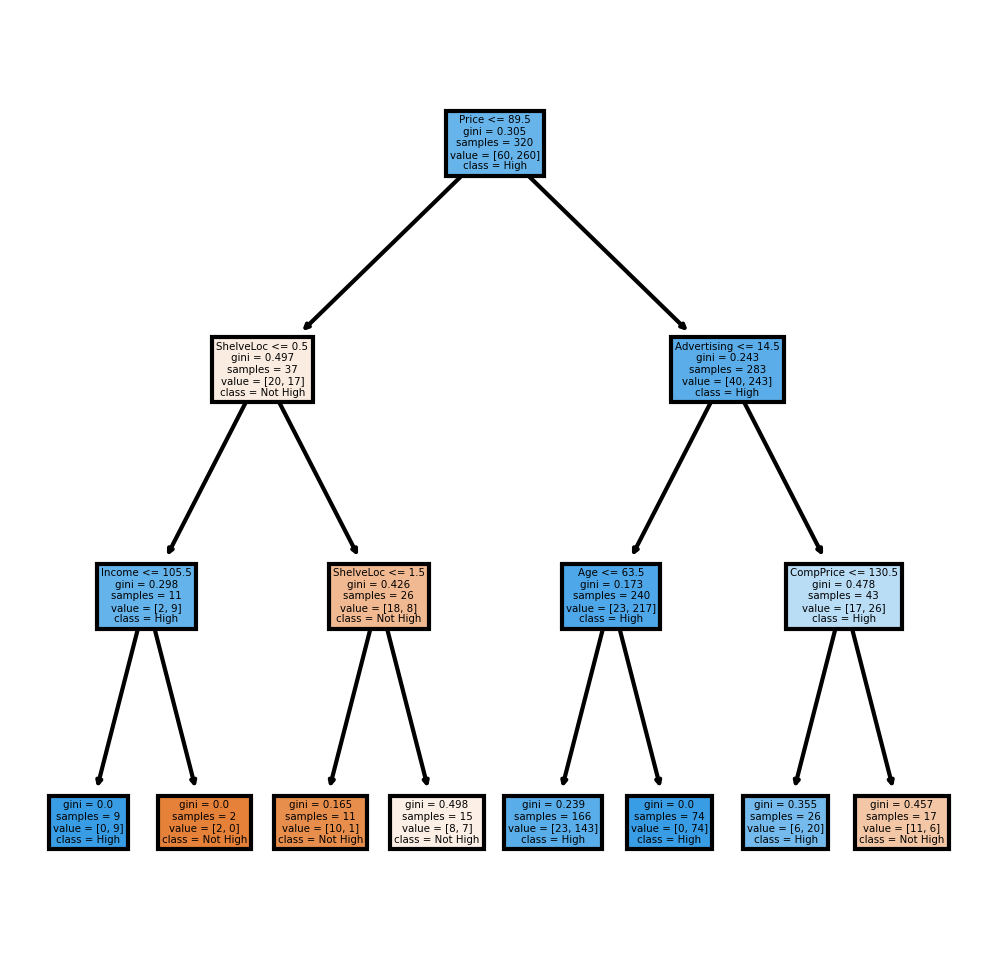

In [21]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban']
cn=['Not High','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);